# GAN
https://poloclub.github.io/ganlab/

生成对抗网络（Generative Adversarial Network，简称 GAN）是一种深度学习模型，由 Ian Goodfellow 等人在 2014 年提出。GAN 由两个[神经网络](./Neural_Network.ipynb)组成：生成器（Generator）和判别器（Discriminator）。这两个网络通过对抗训练的方式相互竞争，从而使生成器能够生成逼真的数据。

### GAN 的基本原理
GAN 的基本思想是通过生成器和判别器之间的博弈过程，使生成器生成的假数据逐渐逼近真实数据的分布。

1. **生成器（Generator）**：
   - 生成器的目标是生成逼真的数据，使得判别器无法区分这些数据和真实数据。
   - 生成器接受一个随机噪声向量作为输入，并生成一个数据样本（例如图像）。

2. **判别器（Discriminator）**：
   - 判别器的目标是区分真实数据和生成器生成的假数据。
   - 判别器接受一个数据样本作为输入，并输出一个概率值，表示该样本是真实数据的概率。

### GAN 的训练过程
GAN 的训练过程是一个博弈过程，生成器和判别器交替训练，直到达到一个平衡状态。

1. **训练判别器**：
   - 使用真实数据样本训练判别器，使其输出接近 1。
   - 使用生成器生成的假数据样本训练判别器，使其输出接近 0。
   - 判别器的损失函数通常是二元交叉熵损失（Binary Cross-Entropy Loss）。

2. **训练生成器**：
   - 使用生成器生成的假数据样本训练生成器，使判别器认为这些假数据是真实的。
   - 生成器的损失函数通常是判别器对假数据的输出的负对数概率。

### GAN 的损失函数
GAN 的损失函数由生成器和判别器的损失函数组成。

1. **判别器的损失函数**：
   - 判别器的损失函数是对真实数据的输出的负对数概率加上对假数据的输出的负对数概率。
   - 公式：`L_D = -E[log(D(x))] - E[log(1 - D(G(z)))]`
   - 其中，`D(x)` 是判别器对真实数据 `x` 的输出，`D(G(z))` 是判别器对生成器生成的假数据 `G(z)` 的输出。

2. **生成器的损失函数**：
   - 生成器的损失函数是判别器对假数据的输出的负对数概率。
   - 公式：`L_G = -E[log(D(G(z)))]`
   - 其中，`D(G(z))` 是判别器对生成器生成的假数据 `G(z)` 的输出。

### GAN 的训练算法
以下是 GAN 的训练算法的伪代码：

```python
for number of training iterations do:
    for k steps do:
        # 训练判别器
        1. 从真实数据分布中采样一批真实数据样本 x
        2. 从噪声分布中采样一批噪声向量 z
        3. 使用生成器生成一批假数据样本 G(z)
        4. 计算判别器的损失 L_D
        5. 更新判别器的参数，使 L_D 最小化

    # 训练生成器
    1. 从噪声分布中采样一批噪声向量 z
    2. 使用生成器生成一批假数据样本 G(z)
    3. 计算生成器的损失 L_G
    4. 更新生成器的参数，使 L_G 最小化
```

### GAN 的应用
GAN 在许多领域有广泛的应用，包括但不限于：
- **图像生成**：生成高质量的图像，如人脸图像、艺术作品等。
- **图像修复**：修复损坏的图像或填补图像中的缺失部分。
- **图像超分辨率**：将低分辨率图像转换为高分辨率图像。
- **数据增强**：生成更多的训练数据，以提高模型的性能。
- **风格迁移**：将一种图像的风格迁移到另一种图像上。

### 代码示例
以下是一个简单的 GAN 代码示例，展示如何使用 PyTorch 实现 GAN。

#### 生成器和判别器模型
```python
import torch.nn as nn
import torch

class Generator(nn.Module):
    def __init__(self, latent_dim=100):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 28 * 28),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), 1, 28, 28)
        return img

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        validity = self.model(img_flat)
        return validity
```

#### 训练代码
```python
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 超参数
latent_dim = 100
batch_size = 64
learning_rate = 0.0002
epochs = 100

# 数据加载
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
dataloader = DataLoader(datasets.MNIST('.', download=True, transform=transform), batch_size=batch_size, shuffle=True)

# 初始化模型和优化器
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
adversarial_loss = nn.BCELoss()

# 训练
for epoch in range(epochs):
    for i, (imgs, _) in enumerate(dataloader):
        real_imgs = imgs.to(device)
        valid = torch.ones(imgs.size(0), 1, device=device)
        fake = torch.zeros(imgs.size(0), 1, device=device)

        # 训练生成器
        optimizer_G.zero_grad()
        z = torch.randn(imgs.size(0), latent_dim, device=device)
        gen_imgs = generator(z)
        g_loss = adversarial_loss(discriminator(gen_imgs), valid)
        g_loss.backward()
        optimizer_G.step()

        # 训练判别器
        optimizer_D.zero_grad()
        real_loss = adversarial_loss(discriminator(real_imgs), valid)
        fake_loss = adversarial_loss(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

        print(f"[Epoch {epoch}/{epochs}] [Batch {i}/{len(dataloader)}] [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")
```

### 解释
1. **生成器和判别器模型**：定义生成器和判别器的网络结构。
2. **训练代码**：定义训练过程，包括数据加载、模型初始化、优化器设置和训练循环。

通过这种方式，你可以实现一个简单的 GAN，并理解其基本原理和训练过程。如果你有任何问题，请随时提问。

找到具有 1 个许可证类型的类似代码

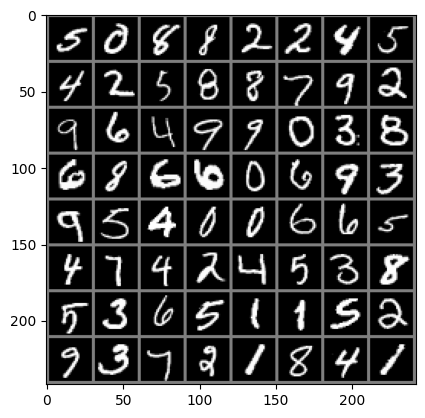

    5     0     8     8     2     2     4     5


In [46]:
import os
import sys
import numpy as np
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
# print(BASE_DIR)
sys.path.append(BASE_DIR)
from src.config import DATA_DIR

# 定义数据转换
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
# 加载 MNIST 数据集
train_dataset = datasets.MNIST(root=DATA_DIR, train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# 获取一个批次的数据
data_iter = iter(train_loader)
# images, labels = data_iter.next()
images, labels = next(data_iter)

# 定义函数来显示图像
def imshow(img):
    img = img / 2 + 0.5  # 反归一化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 显示一些图像
imshow(torchvision.utils.make_grid(images))

# 打印标签
print(' '.join('%5s' % labels[j].item() for j in range(8)))

### 使用 MNIST 数据集进行训练
以下是如何使用 MNIST 数据集训练生成对抗网络（GAN）的详细步骤。

#### 1. 导入必要的库
首先，我们需要导入必要的库，包括 PyTorch 和 torchvision。

```python
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
```

#### 2. 定义生成器和判别器模型
我们需要定义生成器和判别器模型。

```python
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 28 * 28),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x).view(-1, 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x.view(-1, 28 * 28))
```

#### 3. 初始化模型、优化器和损失函数
我们需要初始化生成器和判别器模型，以及优化器和损失函数。

```python
generator = Generator()
discriminator = Discriminator()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)
criterion = nn.BCELoss()
```

#### 4. 加载 MNIST 数据集
我们使用 torchvision 提供的工具加载 MNIST 数据集。

```python
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
```

#### 5. 训练过程
我们定义训练过程，包括训练判别器和生成器。

```python
num_epochs = 50
for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(train_loader):
        batch_size = real_images.size(0)
        
        # 训练判别器
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)
        
        # 真实数据损失
        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)
        
        # 生成假数据
        z = torch.randn(batch_size, 100)
        fake_images = generator(z)
        
        # 假数据损失
        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        
        # 总损失
        d_loss = d_loss_real + d_loss_fake
        
        # 反向传播和优化
        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()
        
        # 训练生成器
        z = torch.randn(batch_size, 100)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        
        # 生成器损失
        g_loss = criterion(outputs, real_labels)
        
        # 反向传播和优化
        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()
        
        if (i+1) % 200 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

print("训练完成")
```

### 解释
1. **导入库**：导入 PyTorch 和 torchvision 库。
2. **定义模型**：定义生成器和判别器模型。
3. **初始化**：初始化生成器和判别器模型，以及优化器和损失函数。
4. **加载数据集**：使用 torchvision 提供的工具加载 MNIST 数据集，并进行归一化处理。
5. **训练过程**：
   - **训练判别器**：计算真实数据和假数据的损失，并更新判别器的参数。
   - **训练生成器**：计算生成器的损失，并更新生成器的参数。
6. **重复训练**：重复上述步骤，直到达到指定的训练轮数。

通过这种方式，你可以使用 MNIST 数据集训练一个简单的生成对抗网络（GAN），生成逼真的手写数字图像。希望这个解释能帮助你更好地理解 GAN 的训练过程。如果你有任何问题，请随时提问。

找到具有 2 个许可证类型的类似代码

训练生成对抗网络（GAN）的过程涉及两个主要部分：生成器（Generator）和判别器（Discriminator）。GAN 的训练过程是一个博弈过程，生成器试图生成逼真的数据以欺骗判别器，而判别器试图区分真实数据和生成数据。以下是训练过程的详细步骤：

### 1. 初始化
- **生成器**：生成器是一个神经网络，它接受随机噪声作为输入，并生成数据（例如图像）。
- **判别器**：判别器是另一个神经网络，它接受数据（真实数据或生成数据）作为输入，并输出一个概率，表示输入数据是真实的概率。

### 2. 损失函数
- **生成器的损失函数**：生成器的目标是生成逼真的数据，使得判别器认为这些数据是真实的。生成器的损失函数通常是判别器对生成数据的输出的负对数概率。
- **判别器的损失函数**：判别器的目标是区分真实数据和生成数据。判别器的损失函数通常是对真实数据的输出的负对数概率加上对生成数据的输出的负对数概率。

### 3. 训练步骤
训练过程通常分为以下几个步骤：

#### 1. 训练判别器
1. **从真实数据集中采样**：从真实数据集中采样一批数据。
2. **生成假数据**：从随机噪声中生成一批假数据。
3. **计算判别器的损失**：
   - 对真实数据计算损失：判别器对真实数据的输出应该接近1。
   - 对假数据计算损失：判别器对假数据的输出应该接近0。
4. **更新判别器**：通过反向传播和优化器更新判别器的参数。

#### 2. 训练生成器
1. **生成假数据**：从随机噪声中生成一批假数据。
2. **计算生成器的损失**：生成器的目标是使判别器认为假数据是真实的，因此生成器的损失是判别器对假数据的输出的负对数概率。
3. **更新生成器**：通过反向传播和优化器更新生成器的参数。

### 4. 重复训练
重复上述步骤，直到生成的数据足够逼真，判别器无法区分真实数据和生成数据。

### 示例代码
以下是一个简单的 GAN 训练过程的示例代码：

```python
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 定义生成器模型
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 28 * 28),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x).view(-1, 1, 28, 28)

# 定义判别器模型
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x.view(-1, 28 * 28))

# 初始化模型、优化器和损失函数
generator = Generator()
discriminator = Discriminator()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)
criterion = nn.BCELoss()

# 加载数据集
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# 训练过程
num_epochs = 50
for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(train_loader):
        batch_size = real_images.size(0)
        
        # 训练判别器
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)
        
        # 真实数据损失
        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)
        
        # 生成假数据
        z = torch.randn(batch_size, 100)
        fake_images = generator(z)
        
        # 假数据损失
        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        
        # 总损失
        d_loss = d_loss_real + d_loss_fake
        
        # 反向传播和优化
        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()
        
        # 训练生成器
        z = torch.randn(batch_size, 100)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        
        # 生成器损失
        g_loss = criterion(outputs, real_labels)
        
        # 反向传播和优化
        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()
        
        if (i+1) % 200 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

print("训练完成")
```

### 解释
1. **定义模型**：定义生成器和判别器模型。
2. **初始化**：初始化模型、优化器和损失函数。
3. **加载数据集**：加载 MNIST 数据集。
4. **训练过程**：
   - **训练判别器**：计算真实数据和假数据的损失，并更新判别器的参数。
   - **训练生成器**：计算生成器的损失，并更新生成器的参数。
5. **重复训练**：重复上述步骤，直到达到指定的训练轮数。

通过这种方式，你可以训练一个简单的生成对抗网络（GAN），生成逼真的手写数字图像。

找到具有 2 个许可证类型的类似代码

In [1]:
import torch

### loss

In [ ]:
# adversarial_loss(input, target) = -1/n * (target * log(input) + (1 - target) * log(1 - input))
# 二元交叉熵
adversarial_loss = torch.nn.BCELoss()

$$
\text{BCELoss}(x, y) = - \left( y \cdot \log(x) + (1 - y) \cdot \log(1 - x) \right) \\
= - \frac{1}{N} \sum_{i=1}^{N} \left( y_i \cdot \log(x_i) + (1 - y_i) \cdot \log(1 - x_i) \right)
$$

In [ ]:
import torch
import torch.nn as nn

# 创建 BCELoss 对象
criterion = nn.BCELoss()

# 模拟预测值和目标值
# 预测值通常是通过 sigmoid 激活函数输出的概率值
predictions = torch.tensor([0.9, 0.2, 0.8, 0.4], dtype=torch.float32)
# 目标值为 0 或 1
targets = torch.tensor([1.0, 0.0, 1.0, 0.0], dtype=torch.float32)

# 计算 BCELoss
loss = criterion(predictions, targets)

print(f"BCELoss: {loss.item()}")

def custom_bce_loss(predictions, targets):
    epsilon = 1e-12 # 防止 log(0) 的情况发生
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    bce = - targets * torch.log(predictions) - (1. - targets) * torch.log(1. - predictions)
    return torch.mean(bce)

# 计算自定义 BCELoss
custom_loss = custom_bce_loss(predictions, targets)
print(f"Custom BCELoss: {custom_loss.item()}")

BCELoss: 0.26561832427978516
Custom BCELoss: 0.26561829447746277


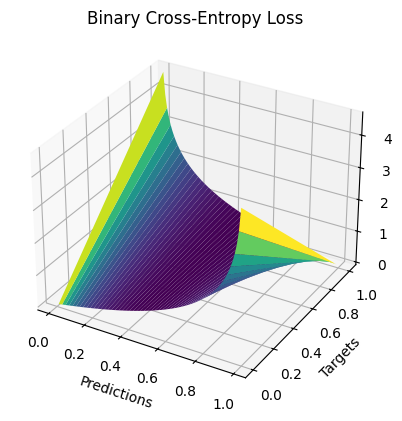

In [7]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建 BCELoss 对象
criterion = nn.BCELoss()

# 自定义 BCELoss 计算函数
def custom_bce_loss(predictions, targets):
    epsilon = 1e-12  # 防止 log(0) 的情况发生
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    bce = - targets * torch.log(predictions) - (1. - targets) * torch.log(1. - predictions)
    return bce

# 创建预测值和目标值的网格
preds = np.linspace(0.01, 0.99, 100)  # 避免 log(0)
targets = np.linspace(0, 1, 2)  # 目标值为 0 或 1

# 创建网格
P, T = np.meshgrid(preds, targets)

# 计算损失值
loss_values = np.zeros_like(P)
for i in range(P.shape[0]):
    for j in range(P.shape[1]):
        loss_values[i, j] = custom_bce_loss(torch.tensor(P[i, j]), torch.tensor(T[i, j])).item()

# 绘制三维图像
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(P, T, loss_values, cmap='viridis')

ax.set_xlabel('Predictions')
ax.set_ylabel('Targets')
ax.set_zlabel('BCELoss')
ax.set_title('Binary Cross-Entropy Loss')

plt.show()